<a href="https://www.kaggle.com/code/samyabose/fake-news-detection-using-lstm?scriptVersionId=98621402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fake News Detection using LSTM
---
## Problem Statement ~
> A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain
false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble. <br> Build a Deep Learning model using LSTM cells to detect fake news.

## Dataset ~
> The dataset can be downloaded from the following link.
**Link:** https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

### Table of Contents¶
#### 1. Environment Setup
#### 2. Dataset Gathering
#### 3. Exploratory Data Analysis
#### 4. Dataset Preprocessing
#### 5. Model Evaluation
#### 6. Performance Measurement

# 1. Environment Setup:
---
> In this step, we have installed and imported all neccessary libraries required to proceed with the solution to the given problem statement.

In [1]:
import re
import nltk
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

# 2. Dataset Gathering
---
> In this step, we have downloaded the dataset from the given link and have verified its integrity.

In [2]:
data = pd.read_csv('../input/fake-news-detection/news.csv')

# 3. Exploratory Data Analysis
---
> In this step, we took a deeper look at the data, and checked if the data is properly gathered in the previous steps.

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
labels = data.groupby('label').sum()
labels.columns = ['count']
labels.head()

,count
label,
FAKE,25034508
REAL,8416925


Text(0.5, 1.0, 'Count of both type of news')

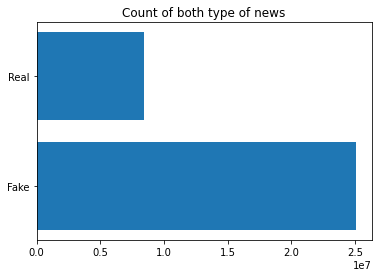

In [5]:
plt.barh(['Fake', 'Real'], labels['count'])
plt.title('Count of both type of news')

# 4. Data Preprocessing:
---
> In this step, we have cleaned the data thus obtained for the previous steps before splitting them into training and testing datasets.

In [6]:
data = pd.DataFrame(data)

In [7]:
encoder = preprocessing.LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [8]:
features = data['title']
labels = data['label']

#### Cleaning the data
> In this step, we have performed stop words removal, special character/url removal, lower case assertion and then we have finally created a corpus.

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(len(features)):
    text = features[i]
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(t) for t in text if t not in stopwords.words('english')]
    corpus.append(' '.join(text))

In [10]:
len(corpus)

6335

#### One-hot encoding
> In this step, we have performed one-hot encoding on the texts.

In [11]:
vocab_size = 5000
sent_len = 20
one_hot_encoded = [one_hot(x,vocab_size) for x in corpus]
one_hot_encoded = pad_sequences(one_hot_encoded,maxlen=sent_len)
one_hot_encoded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 3367, 1029, 4572], dtype=int32)

In [12]:
features = np.array(one_hot_encoded)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# 5. Model Evaluation:
---
> In this step, we have chosen LSTM layers for our model as it poses the most performance in problems such as these, where even a small amount of data can provide a lot of insight to the model. The LSTM model actually sees the input data as a sequence, so it's able to learn patterns from sequenced data (assuming it exists) better than the other ones, especially patterns from long sequences. LSTM cells maintain a cell state which preserves the context of the text sequences.

In [13]:
model = Sequential()
model.add(Embedding(vocab_size,40,input_length=sent_len))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

2022-06-17 14:21:56.281828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 14:21:56.291390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 14:21:56.292113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 14:21:56.293545: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=40)

Epoch 1/40


2022-06-17 14:21:57.458705: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-17 14:21:59.084275: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


67/67 [==============================] - 3s 13ms/step - loss: 0.9576 - accuracy: 0.5212 - val_loss: 0.6617 - val_accuracy: 0.5791
Epoch 2/40
67/67 [==============================] - 0s 7ms/step - loss: 0.6426 - accuracy: 0.6312 - val_loss: 0.6093 - val_accuracy: 0.7030
Epoch 3/40
67/67 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.6499 - val_loss: 0.5315 - val_accuracy: 0.7441
Epoch 4/40
67/67 [==============================] - 0s 6ms/step - loss: 0.4683 - accuracy: 0.8025 - val_loss: 1.5394 - val_accuracy: 0.5285
Epoch 5/40
67/67 [==============================] - 0s 6ms/step - loss: 1.0189 - accuracy: 0.5660 - val_loss: 0.7043 - val_accuracy: 0.6581
Epoch 6/40
67/67 [==============================] - 0s 6ms/step - loss: 0.4551 - accuracy: 0.7861 - val_loss: 0.5539 - val_accuracy: 0.7451
Epoch 7/40
67/67 [==============================] - 0s 6ms/step - loss: 0.4356 - accuracy: 0.8162 - val_loss: 0.7415 - val_accuracy: 0.6868
Epoch 8/40
67/67 [============

In [15]:
pred = np.where(model.predict(X_test) > 0.5, 1,0)

# 6. Performance Measurement
---
> In this step, we have evaluated the performance measure of the model.

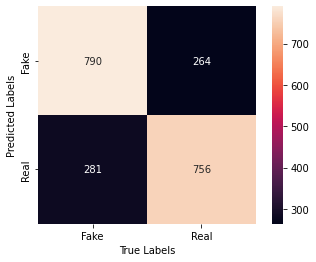

In [16]:
# Plotting the confusion matrix

import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", xticklabels = ['Fake', 'Real'], yticklabels = ['Fake', 'Real'])
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [17]:
# Measuring Accuracy

from sklearn import metrics

print(metrics.classification_report(y_test, pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1071
           1       0.73      0.74      0.74      1020

    accuracy                           0.74      2091
   macro avg       0.74      0.74      0.74      2091
weighted avg       0.74      0.74      0.74      2091

